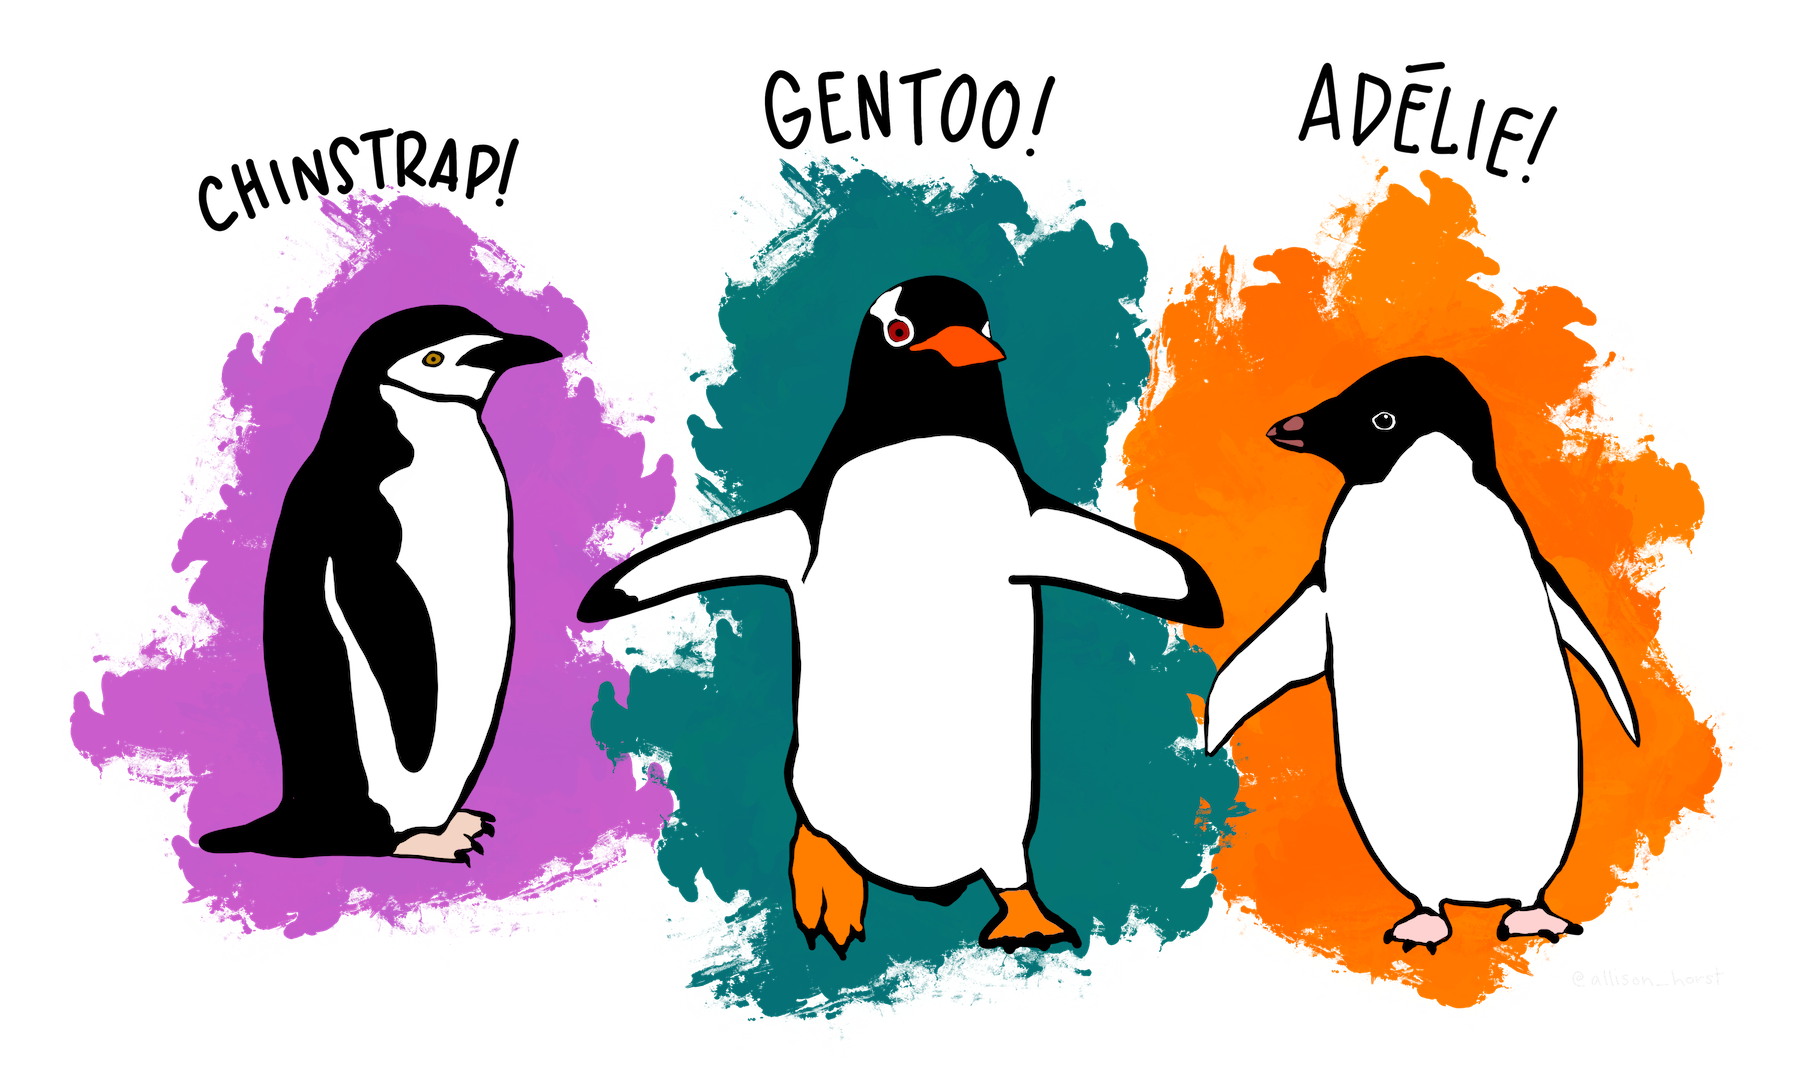

# Parte 1: Leitura e Preparação dos Dados

## Importação de Bibliotecas

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
import pandas as pd
from matplotlib import pyplot as plt

## Leitura dos Dados

In [ ]:
# Baixa o dataset 
!gdown https://drive.google.com/uc?id=1QAIFKPcympHskynwawiPYQE_nMb8g-iB

Downloading...
From: https://drive.google.com/uc?id=1QAIFKPcympHskynwawiPYQE_nMb8g-iB
To: /content/penguins_size.csv
100% 13.5k/13.5k [00:00<00:00, 22.5MB/s]


In [ ]:
dataset = pd.read_csv('penguins_size.csv')
dataset.dropna(inplace=True)

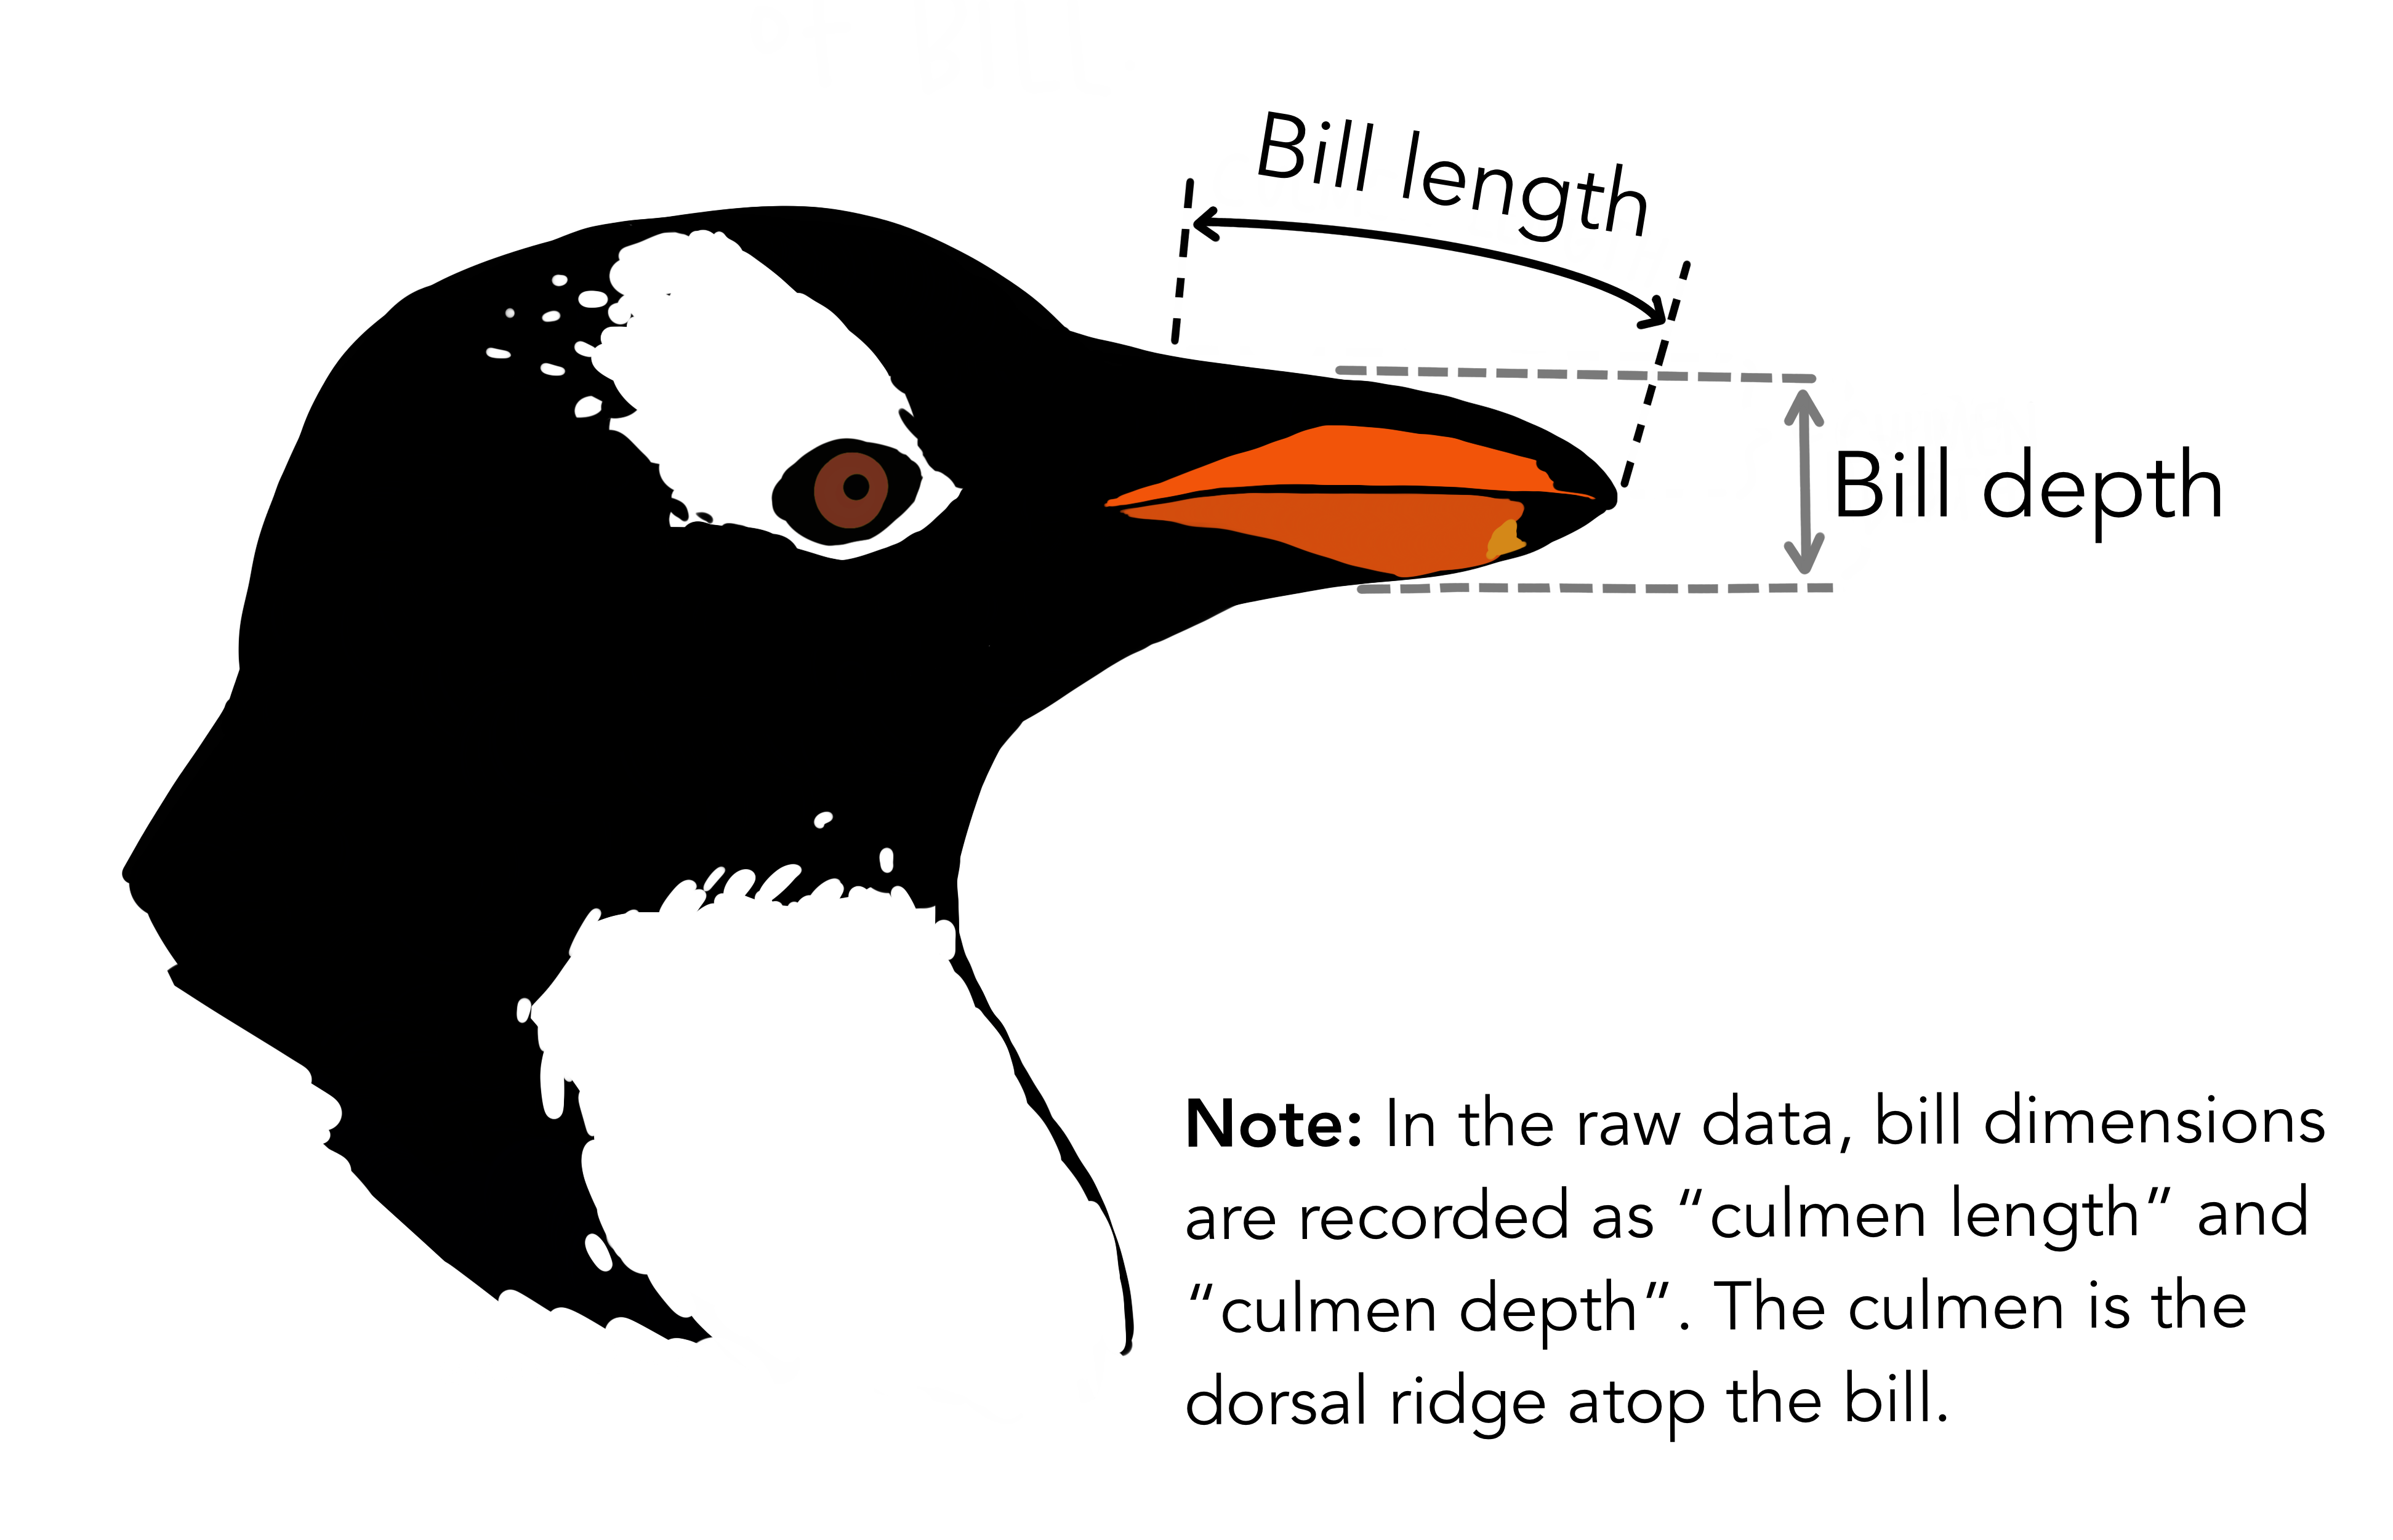

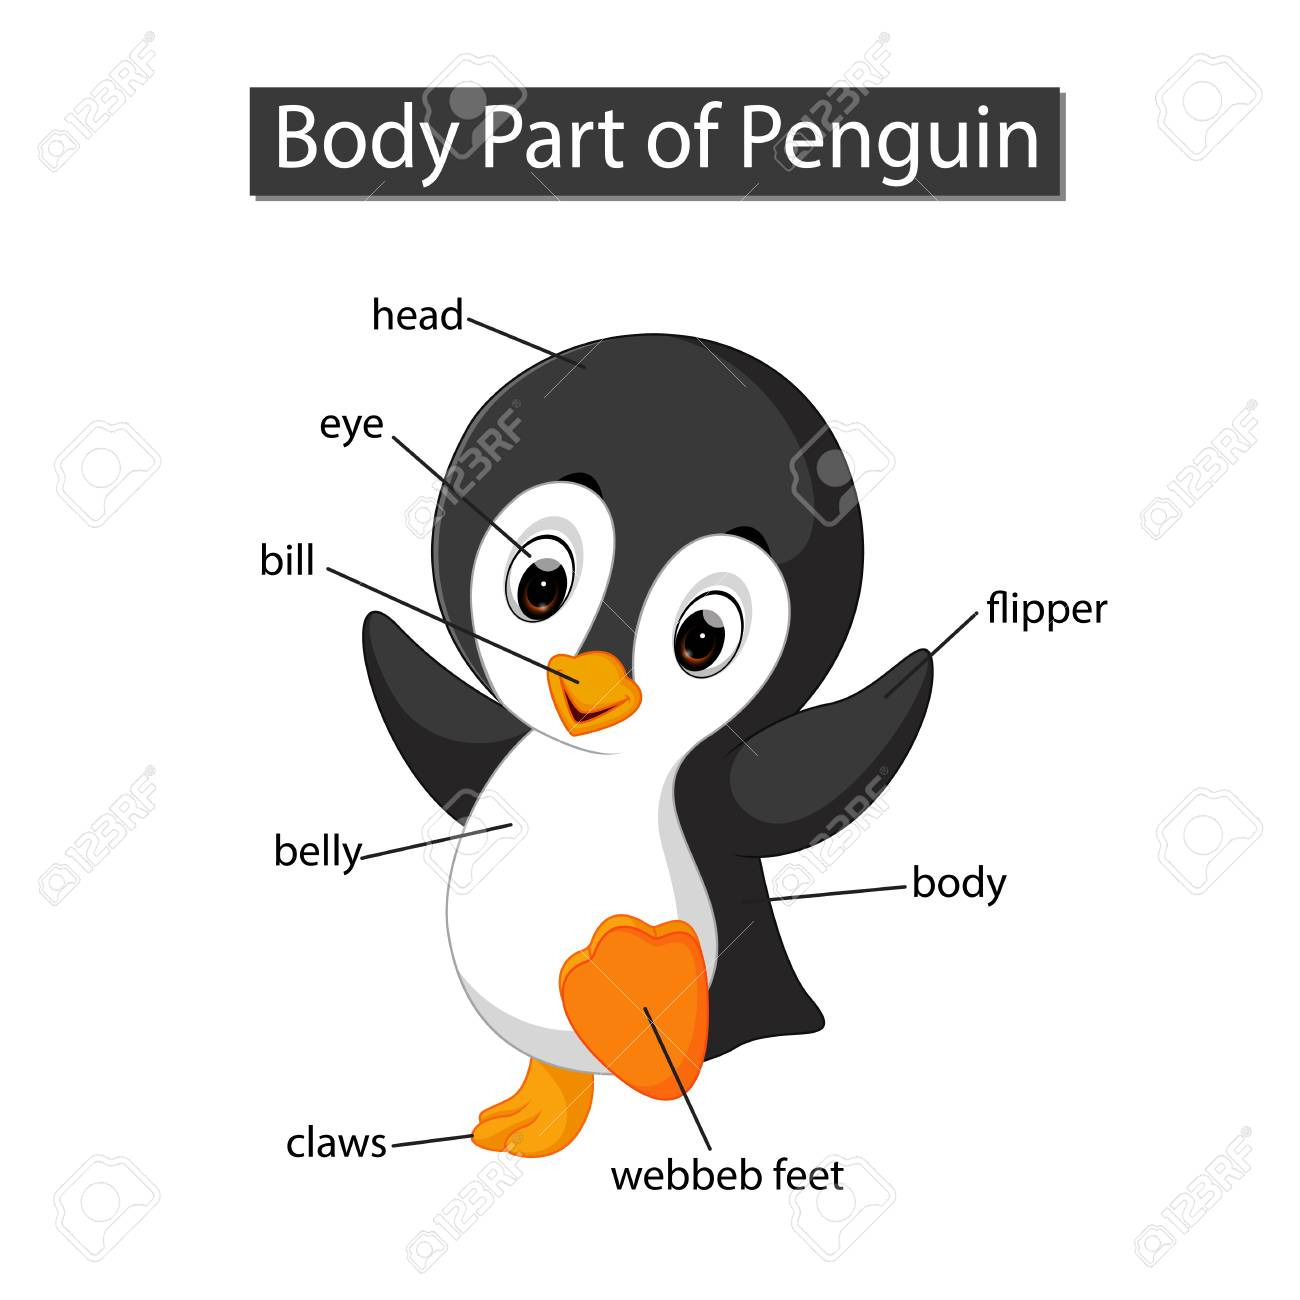

In [ ]:
dataset

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
# Leitura dos dados
X = dataset.iloc[:, [2,3,4,5,6]]
Y = dataset.iloc[:, 0]

def penguin_type(x):
  if x == 'Adelie':
    return [0., 0., 1.]
  elif x == 'Chinstrap':
    return [0., 1., 0.]
  elif x == 'Gentoo':
    return [1., 0., 0.]
  
X.sex = X.apply(lambda x: 0. if x.sex == 'FEMALE' else 1., axis=1)
Y = Y.apply(penguin_type)
Y = pd.DataFrame.from_dict(dict(zip(Y.index, Y.values))).T
print(X, Y)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0                39.1             18.7              181.0       3750.0  1.0
1                39.5             17.4              186.0       3800.0  0.0
2                40.3             18.0              195.0       3250.0  0.0
4                36.7             19.3              193.0       3450.0  0.0
5                39.3             20.6              190.0       3650.0  1.0
..                ...              ...                ...          ...  ...
338              47.2             13.7              214.0       4925.0  0.0
340              46.8             14.3              215.0       4850.0  0.0
341              50.4             15.7              222.0       5750.0  1.0
342              45.2             14.8              212.0       5200.0  0.0
343              49.9             16.1              213.0       5400.0  1.0

[334 rows x 5 columns]        0    1    2
0    0.0  0.0  1.0
1    0.0  0.0  1.0
2    0.

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Embaralhamento e Separação dos Dados

In [ ]:
Xt, Xv, Yt, Yv = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=None, shuffle=True)

In [ ]:
print('Dados de treinamento:')
print('Xt', len(Xt), 'Yt', len(Yt))
print()
print('Dados de validação:')
print('Xv', len(Xv), 'Yv', len(Yv))

Dados de treinamento:
Xt 267 Yt 267

Dados de validação:
Xv 67 Yv 67


# Parte 2: Arquitetura da Rede Neural

1.   `lin1`: Camada feedforward.
2.   `drp1`: Dropout de 25%.
3.   `lin2`: Camada feedforward.
4.   `drp2`: Dropout de 25%.
5.   `lin3`: Camada feedforward que recebe os dados serializados e gera as saídas. A função de ativação final é _softmax_.

# Parte 3: Código da Rede Neural


In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.lin1 = nn.Linear(in_features=5, out_features=30)
        self.drp1 = nn.Dropout(p=0.25)
        self.lin2 = nn.Linear(in_features=30, out_features=30)    
        self.drp2 = nn.Dropout(p=0.10)
        self.lin3 = nn.Linear(in_features=30, out_features=3)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.lin1(x))
        x = self.drp1(x)
        x = self.relu(self.lin2(x))
        x = self.drp2(x)
        x = self.lin3(x)
        return x

In [ ]:
neural_network = ANN()
print(neural_network)

ANN(
  (lin1): Linear(in_features=5, out_features=30, bias=True)
  (drp1): Dropout(p=0.25, inplace=False)
  (lin2): Linear(in_features=30, out_features=30, bias=True)
  (drp2): Dropout(p=0.1, inplace=False)
  (lin3): Linear(in_features=30, out_features=3, bias=True)
  (relu): ReLU()
)


# Parte 4: Treinamento

In [ ]:
def evaluate(x, y_hat):
  y = neural_network(x).argmax(dim=1)
  y_hat = y_hat.argmax(dim=1)
  return 100*float((y == y_hat).sum()) / len(y)

Abaixo criamos os objetos `opt` que será o otimizador Adam, com passo de aprendizagem 0,0001, e função de custo entropia cruzada no objeto `loss`.

In [ ]:
opt = optim.Adam(neural_network.parameters(), lr=0.0001)
loss = nn.CrossEntropyLoss()

#### Movendo tudo para a GPU

In [ ]:
gpu = torch.device("cuda:0")
neural_network = neural_network.to(gpu)
Xt = torch.Tensor(Xt.to_numpy()).to(gpu, dtype=torch.float)
Yt = torch.Tensor(Yt.to_numpy()).to(gpu, dtype=torch.float)
Xv = torch.Tensor(Xv.to_numpy()).to(gpu, dtype=torch.float)
Yv = torch.Tensor(Yv.to_numpy()).to(gpu, dtype=torch.float)

#### Iniciando o Treinamento

In [ ]:
for j in range(30001):
  # Faremos o treinamento em lotes de
  # tamanho igual a 128 amostras

  for i in range(0, len(Yt), 128):
    # Separa o lote de entradas
    x = Xt[i:i+128,:]

    # Separa o lote de saídas desejadas
    # já transformando de one-hot para
    # índice das colunas.
    y_hat = Yt[i:i+128,:].argmax(dim=1)

    # Zera o gradiente do otimizador
    opt.zero_grad()

    # Calcula a saída da rede neural
    y = neural_network(x)

    # Calcula o erro
    e = loss(y, y_hat)

    # Calcula o gradiente usando
    # backpropagation
    e.backward()

    # Realiza um passo de atualização
    # dos parâmetros da rede neural
    # usando o otimizador.
    opt.step()

  # A cada 200 épocas imprimimos o
  # erro do último lote e a acurácia
  # nos dados de treinamento
  if not (j % 200):
    print('Loss:', float(e), f'Accuracy: {evaluate(Xt, Yt)}')

Loss: 272.68310546875 Accuracy: 20.224719101123597
Loss: 26.492151260375977 Accuracy: 35.2059925093633
Loss: 17.50800132751465 Accuracy: 35.58052434456929
Loss: 12.48129940032959 Accuracy: 34.45692883895131
Loss: 11.73340129852295 Accuracy: 37.827715355805246
Loss: 7.376670837402344 Accuracy: 40.823970037453186
Loss: 1.5198676586151123 Accuracy: 38.57677902621723
Loss: 1.221510648727417 Accuracy: 42.69662921348315
Loss: 0.9030916094779968 Accuracy: 47.19101123595506
Loss: 1.1017018556594849 Accuracy: 51.31086142322097
Loss: 0.9555432796478271 Accuracy: 48.68913857677903
Loss: 0.9760612845420837 Accuracy: 47.940074906367045
Loss: 0.984799325466156 Accuracy: 48.31460674157304
Loss: 1.1244852542877197 Accuracy: 50.93632958801498
Loss: 1.2546734809875488 Accuracy: 48.31460674157304
Loss: 1.0071492195129395 Accuracy: 48.68913857677903
Loss: 1.027401089668274 Accuracy: 51.68539325842696
Loss: 1.1505799293518066 Accuracy: 56.17977528089887
Loss: 1.068061351776123 Accuracy: 47.19101123595506
L

Depois de treinar a rede neural, podemos desligar a camada de _dropout_ e mostrar o resultado nos dados de validação.

In [ ]:
neural_network.eval()  # desliga o dropout

ANN(
  (lin1): Linear(in_features=5, out_features=30, bias=True)
  (drp1): Dropout(p=0.25, inplace=False)
  (lin2): Linear(in_features=30, out_features=30, bias=True)
  (drp2): Dropout(p=0.1, inplace=False)
  (lin3): Linear(in_features=30, out_features=3, bias=True)
  (relu): ReLU()
)

In [ ]:
ac = evaluate(Xv, Yv)
print(f'Accuracy: {ac}%')

Accuracy: 100.0%


# Parte 5: Examinando os Resultados

In [ ]:
result_dict = {0: 'Gentoo', 1: 'Chinstrap', 2: 'Adelie'}
def result_type(x):
  if x[0]:
    return 'Gentoo'
  elif x[1]:
    return 'Chinstrap'
  elif x[2]:
    return 'Adelie'

index_test = np.random.randint(0, len(Xv)-1)
input_test = Xv[index_test]
gt_test = Yv[index_test]
print('Amostra de teste:', input_test)
print('Resultado esperado:', result_type(gt_test))

result = neural_network(input_test).cpu().detach().numpy()
result = np.exp(result)/np.sum(np.exp(result))
print('Saida da rede neural:', result_dict[result.argmax()])

Amostra de teste: tensor([  34.6000,   17.2000,  189.0000, 3200.0000,    0.0000],
       device='cuda:0')
Resultado esperado: Adelie
Saida da rede neural: Adelie
